# 1번 문제

In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

X = np.genfromtxt('wine-clustering.csv', delimiter=',', skip_header = 1)

Xmin = np.min(X, axis = 0)
Xmax = np.max(X, axis = 0)
X = (X - Xmin) / Xmax

# N: 샘플 수 D: 차원 (178,13)
(N,D) = X.shape

In [2]:
def train_kmeans(X, mu_init, maxIter):
    mu_init = mu_init
    dist = np.zeros((N,2))

    for iter in range(0, maxIter):
        # 1. 전체 데이터에 대해서, 각각의 mu로부터 거리 계산
        for k in range(0,2):
            dist[:,k] = np.sum((X - np.matlib.repmat(mu_init[:,k].reshape(1,13),N,1))**2, axis=1)

        # 2. 계산한 거리로부터, 어떤 mu에 가장 가까운지를 계산
        labels = np.argmin(dist, axis=1)

        # 3. 각각 mu에 할당된 샘플들끼리 평균을 계산 -> mu를 업데이트
        for k in range(0, 2):
            mu_init[:,k] = np.mean(X[labels==k, :], axis=0)
        
    return labels

In [3]:
def train_MoG(X, mu_init, maxIter):
    K = 2 # cluster의 개수
    X = X.T # (13,178)
    # initial parameter
    D,N = X.shape # D = 13, N = 178

    # random initialize
    pi = np.random.rand(K)
    pi = pi / np.sum(pi)
    mu = mu_init
    sigma = np.zeros((D,D,K)) # (13,13,2)
    for k in range(0,K):
        sigma[:,:,k] = 1e-2*np.identity(D)

    # 변수 선언
    Num = np.zeros(K)
    gamma = np.zeros((K,N))

    for iter in range(0, maxIter):
        # E-step: 주어진 샘플, 파라미터 => responsibility를 계산
        for k in range(0,K):
            gamma[k,:] = pi[k]*multivariate_normal.pdf(X.T,mu[:,k],sigma[:,:,k])
        gamma = gamma / np.sum(gamma, axis = 0)

        # M-step: 주어진 샘플, responsibility => 파라미터를 계산
        for k in range(0,K):
            Num[k] = np.sum(gamma[k,:]) # np.sum = 전체 샘플에 대한 합
            pi[k] = Num[k] / N

            mu[:,k] = np.sum(np.matlib.repmat(gamma[k,:].reshape(1,N),D,1) * X, axis = 1) / Num[k]

            # residual = (X - mu[k]) = D x N
            residual = (X - np.matlib.repmat(mu[:,k].reshape(D,1),1,N))    
            # gamma_residual = gamma[k,:]*(X - mu[k]) = D x N
            gamma_residual = np.matlib.repmat(gamma[k,:],D,1) * residual
            sigma[:,:,k] = np.zeros((D,D))
            for n in range(0,N):
                sigma[:,:,k] += gamma_residual[:,n].reshape(D,1).dot(residual[:,n].reshape(D,1).T)
            sigma[:,:,k] /= Num[k]

            labels = np.argmax(gamma, axis = 0)
    
    return labels

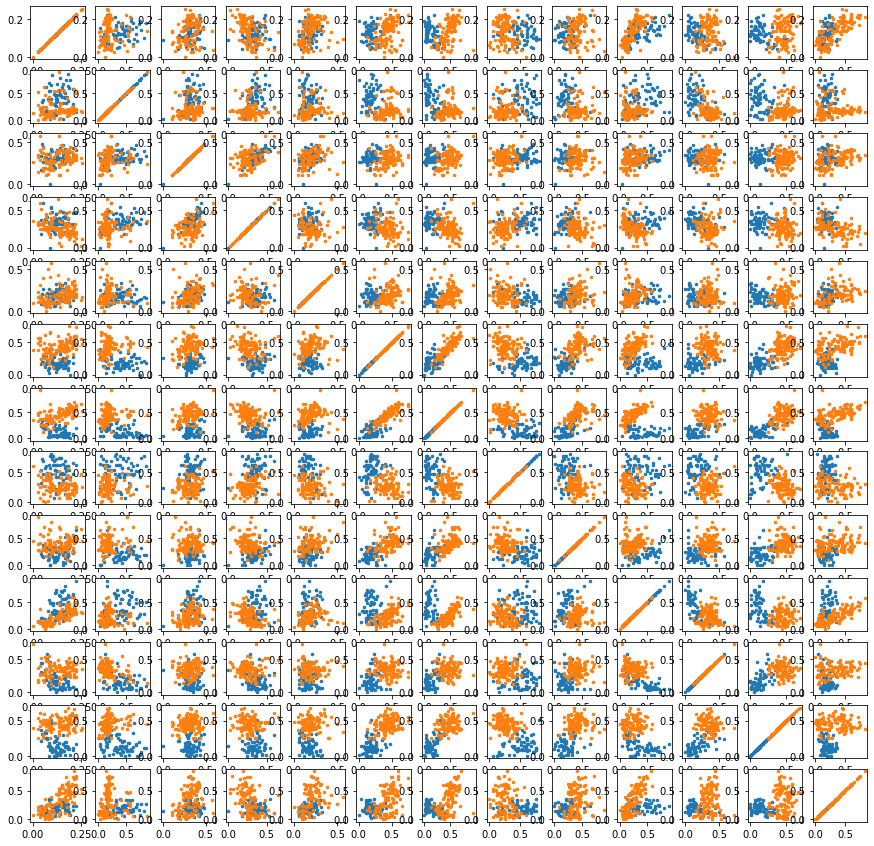

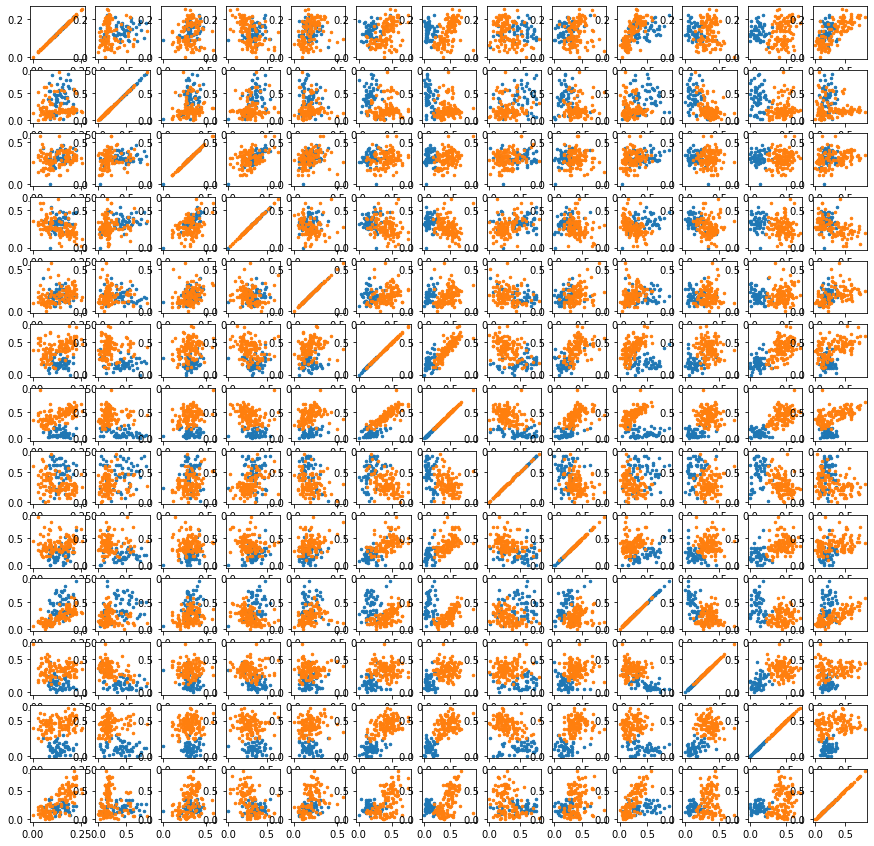

In [4]:
mu_init = np.hstack([0.2*np.ones((13,1)), 0.6*np.ones((13,1))])# 0.2, 0.6 
maxIter = 20

label1 = train_kmeans(X, mu_init, maxIter)
label2 = train_MoG(X, mu_init, maxIter)

plt.figure(figsize = (15, 15))

for i in range(0, D):
    for j in range(0, D):
        plt.subplot(D, D, (i + 1) + D*j)
        for k in range(0,2):
            plt.plot(X[label1 == k,i],X[label1 == k,j],".",markersize = 5)

plt.figure(figsize = (15, 15))

for i in range(0, D):
    for j in range(0, D):
        plt.subplot(D, D, (i + 1) + D*j)
        for k in range(0,2):
            plt.plot(X[label2 == k,i],X[label2 == k,j],".",markersize = 5)

# 2번 문제

Text(0, 0.5, 'y')

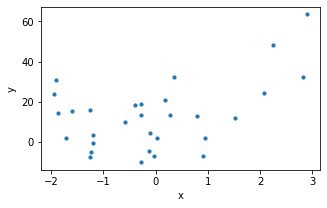

In [5]:
import numpy as np
import matplotlib.pyplot as plt
N = 30
x = 5 * np.random.rand(N, 1) - 2 # x (30,1)
y = 4 + 2*x + 5*x**2 + 0.5*x**3 + 10*np.random.randn(N,1)

plt.figure(figsize = (5,3))
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[[ 8.78776231]
 [-0.68427267]
 [-6.96655654]
 [ 3.92119018]
 [ 2.98546502]
 [-0.99726248]] 

[[ 0.02659074]
 [-0.0034361 ]
 [ 0.05993793]
 [ 0.00654886]
 [ 0.25185415]
 [ 0.14923743]]


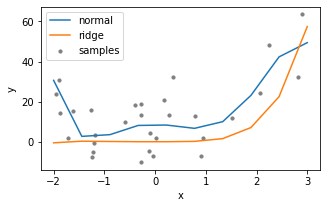

In [6]:
# polynomial regression
D = 6

# design matrix = 샘플 수 * 차원 수
X = np.ones((N,1))
for d in range(1, D):
    X = np.hstack((X,x**d))  

# normal equation
# 1. X.T.dot(X) -> (X^T X) 
# 2. np.linarg.inv(X.T.dot(X)) ->  (X^T X)^{-1}
# 3. np.linalg.inv(X.T.dot(X)).dot(X.T) ->  (X^T X)^{-1} X^T
theta1 = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# ridge regression
alpha = 1e4
theta2 = np.linalg.inv(X.T.dot(X) + alpha*np.identity(D)).dot(X.T).dot(y)

# visualize
x_new = np.linspace(-2,3,10).reshape(-1,1)
y_new1 = theta1[0,0]
y_new2 = theta2[0,0]

for d in range(1, D):
    y_new1 = y_new1 + theta1[d,0]*x_new**d
    y_new2 = y_new2 + theta2[d,0]*x_new**d

        
plt.figure(figsize = (5,3))
plt.scatter(x,y,s=10,color='gray')
plt.plot(x_new,y_new1)


plt.plot(x_new,y_new2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['normal','ridge','samples'])
plt.savefig('ridge.eps')

print(theta1,"\n")
print(theta2)